<a href="https://colab.research.google.com/github/ming80302/Innovator/blob/main/lst_prism_cmp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### LST and PRISM comparison

In [5]:
!pip install cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from osgeo import gdal
# insert a image of LST data domain here
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://mail.google.com/mail/u/0?ui=2&ik=4123481561&attid=0.1&permmsgid=msg-f:1738723476189794376&th=18212fca18ecd048&view=fimg&fur=ip&sz=s0-l75-ft&attbid=ANGjdJ_HHHckqQgdwjIC0I93E_9k1XYkOcbj4MqV3JEfjszcu6C4cXgFZ4bJ4uuiVndrNlbnCXjT72ACq83CsPAIjGFypYhblLF92Uc_ygucjuGSggN2cPG0z94lvl0&disp=emb&realattid=ii_l5r7310p0![image.png](attachment:f7ab58d7-d11a-4ac9-aff4-d08392d221f3.png)![image.png](attachment:8839d3dc-412c-43f4-93ab-67889927250f.png)![image.png](attachment:ea6c65d7-f78f-49c8-adb0-c86e4e61f015.png")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 4.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 38.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 32.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 29.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 31.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 46 kB 4.3 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m

In [12]:
dir = '/content/drive/MyDrive/data/INNOVATOR/'
flnm = [ 'LST_2021_JJA-maximum.tif', 'LST_2021_JJA-mean.tif', 'LST_2021_JJA-median.tif']

#### read and plot Geotiff(.tif) Raster file from Kate

There are  1  band


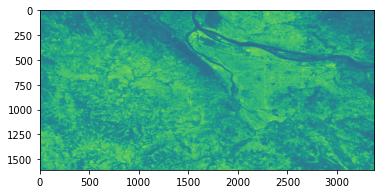

In [15]:
dataset = gdal.Open(dir+flnm[2])
# Counting the total number of bands.
print("There are ", dataset.RasterCount, ' band')

#Fetching the bands
band1 = dataset.GetRasterBand(1) # Red channel
b1 = np.squeeze(band1.ReadAsArray())
#img = np.squeeze(np.dstack((b1)))
plt.imshow(b1);

LST_2021_JJA-maximum.tif
LST_2021_JJA-mean.tif


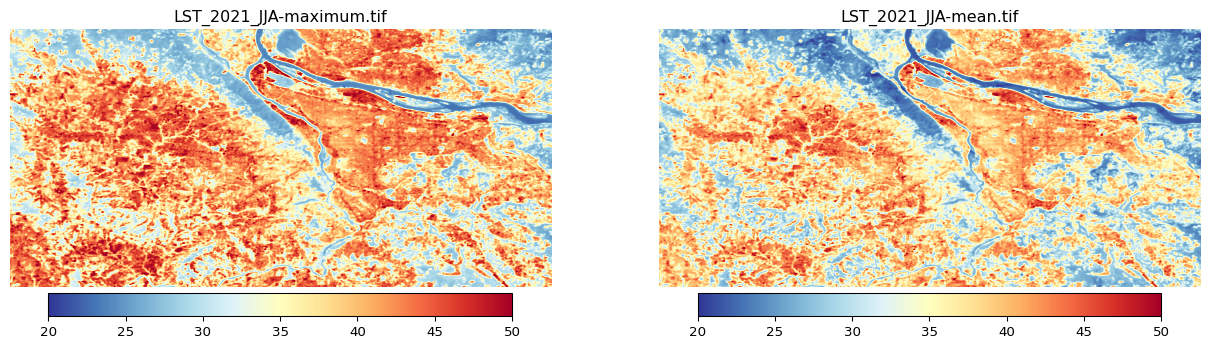

In [16]:
ig, ax = plt.subplots(1, 2, figsize=(16,4), dpi=96)
for i in range(2):
    print(flnm[i])
    dataset = gdal.Open(dir+flnm[i])
    
    #Fetching the bands
    band1 = dataset.GetRasterBand(1) # Red channel
    b1 = np.squeeze(band1.ReadAsArray())
    img = np.squeeze(np.dstack((b1)))
            
    im = ax[i].imshow(b1, vmin=20, vmax=50, cmap='RdYlBu_r')
     
    plt.colorbar(im, ax=ax[i], fraction=0.08, pad=0.02, orientation='horizontal' ) 
    ax[i].set_axis_off()
    ax[i].title.set_text(flnm[i])

#### 2) PRISM Tmax and Tmin of the same day

In [7]:
import xarray as xr
var = ['Tmax', 'T2M', 'Tmin']
dir_i = '/content/drive/MyDrive/data/PRISM/'
flnm = ['PRISM_daily_tmax_2021.nc','PRISM_daily_tmean_2021.nc','PRISM_daily_tmin_2021.nc']

date_s = '2021-06-01'
date_e = '2021-08-31'

# LST domain
lat_s = 45.266736
lat_e = 45.700083
lon_s = -123.190017
lon_e = -122.279934

for i in range(len(flnm)):
    with xr.open_dataset(dir_i + flnm[i]) as ds_prism:
            print(dir_i + flnm[i])
            if var[i]=='Tmax':
              t_max = ds_prism.Tmax.sel(time=slice(date_s, date_e),
                         rlat=slice(lat_e, lat_s), rlon=slice(lon_s, lon_e)).mean(axis=0)
            elif var[i]=='T2M':
              t_mean = ds_prism.T2M.sel(time=slice(date_s, date_e),
                         rlat=slice(lat_e, lat_s), rlon=slice(lon_s, lon_e)).mean(axis=0)
            elif var[i]=='Tmin':
              t_min = ds_prism.Tmin.sel(time=slice(date_s, date_e),
                         rlat=slice(lat_e, lat_s), rlon=slice(lon_s, lon_e)).mean(axis=0)
                

/content/drive/MyDrive/data/PRISM/PRISM_daily_tmax_2021.nc
/content/drive/MyDrive/data/PRISM/PRISM_daily_tmean_2021.nc
/content/drive/MyDrive/data/PRISM/PRISM_daily_tmin_2021.nc


/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_0_countries.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


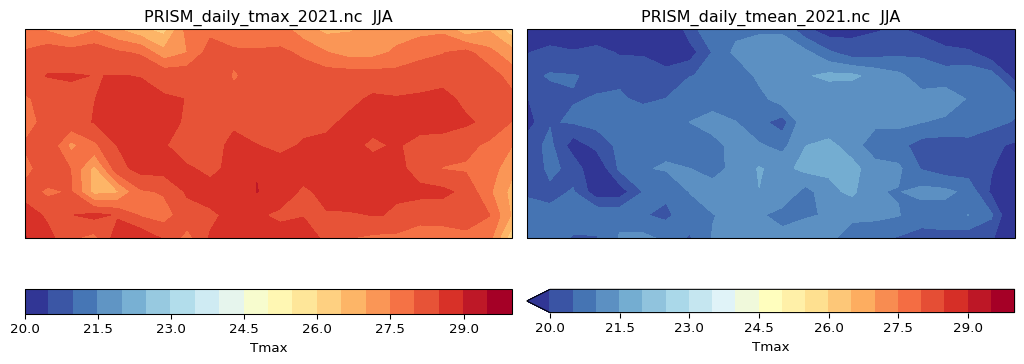

In [9]:
import matplotlib.pyplot as plt
import cartopy
import cartopy.io.shapereader as shpreader
fig = plt.figure(figsize=(16,4), dpi=96)

# James asked for adding county line, Given cartopy's ability to draw shapefiles,
# I download one of those county shapefiles:
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Small-scale/data/Boundaries/countyl010g_shp_nt00964.tar.gz
reader = shpreader.Reader('/content/drive/MyDrive/data/SHAPEFILE/COUNTIES_OREGON/counties.shp')

counties = list(reader.geometries())

COUNTIES = cfeature.ShapelyFeature(counties, ccrs.PlateCarree())

cnlevel = np.linspace(11, 60, num=50)

def ax_coastlines_country(ax_s):
    ax_s.coastlines(linewidths=0.5)
    ax_s.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='10m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.2))
    
t_3d = xr.concat([t_max, t_mean ], dim='variables')

for i in range(2):
        if i == 0:
            cnlevel = np.linspace(20, 30, num=21)
        
        ax_s = plt.subplot(1, 3, i+1, projection=ccrs.PlateCarree())
        ax_coastlines_country(ax_s)
        ax_s.add_feature(COUNTIES, facecolor='none', edgecolor='black', linestyle=':')

        im=t_3d[i].plot.contourf(
            levels=cnlevel,
            #vmin = 20,
            #vmax = 50,
            cmap='RdYlBu_r',
            ax=ax_s,
            transform=ccrs.PlateCarree(),
            cbar_kwargs={'orientation': 'horizontal'},
            add_colorbar=True)
         
        plt.title(flnm[i] + '  JJA')

plt.tight_layout()